# Visualization of Tactics

For this segment I am utilizing the spatio-temporal data (the x/y coordinates) to assess team tactics. We can correlate a collection of point data for each player on a team in a specific game and caculate a centroid for them that can be used to visualize the average position on the field for each player. We can utilize this to see how the team plays.

In [1]:
import pandas as pd
import requests
import json
import numpy as np

import warnings
warnings.filterwarnings("ignore")

In [16]:
soccer= pd.read_csv('soccer.csv')

In [17]:
soccer.head()

,gameweek,winner,competitionId,eventId,subEventName,eventName,teamId,matchPeriod,eventSec,subEventId,lastName,role,x,y,positionGrid
0,38.0,Barcelona,Spanish first division,8.0,Simple pass,Pass,Real Sociedad,1H,1.005442,85,Jiménez López,FW,58.8,40.8,6.0
1,38.0,Barcelona,Spanish first division,8.0,Simple pass,Pass,Real Sociedad,1H,26.009290,85,Jiménez López,FW,86.4,67.2,11.0
2,38.0,Barcelona,Spanish first division,8.0,Simple pass,Pass,Real Sociedad,1H,97.700752,85,Jiménez López,FW,67.2,59.2,10.0
3,38.0,Barcelona,Spanish first division,8.0,Simple pass,Pass,Real Sociedad,1H,132.889252,85,Jiménez López,FW,68.4,66.4,11.0
4,38.0,Barcelona,Spanish first division,8.0,Simple pass,Pass,Real Sociedad,1H,265.013504,85,Jiménez López,FW,98.4,75.2,15.0


In [18]:
soccer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3440476 entries, 0 to 3440475
Data columns (total 15 columns):
 #   Column         Dtype  
---  ------         -----  
 0   gameweek       float64
 1   winner         object 
 2   competitionId  object 
 3   eventId        float64
 4   subEventName   object 
 5   eventName      object 
 6   teamId         object 
 7   matchPeriod    object 
 8   eventSec       float64
 9   subEventId     int64  
 10  lastName       object 
 11  role           object 
 12  x              float64
 13  y              float64
 14  positionGrid   float64
dtypes: float64(6), int64(1), object(8)
memory usage: 393.7+ MB


In [19]:
soccer.describe()

,gameweek,eventId,eventSec,subEventId,x,y,positionGrid
count,3.440476e+06,3.440476e+06,3.440476e+06,3.440476e+06,3.440476e+06,3.440476e+06,3.440476e+06
mean,1.926766e+01,5.694628e+00,1.395034e+03,5.998935e+01,5.874610e+01,3.997302e+01,7.268600e+00
std,1.079841e+01,3.141586e+00,8.357973e+02,3.265973e+01,2.962486e+01,2.423663e+01,4.035913e+00
min,1.000000e+00,1.000000e+00,0.000000e+00,6.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.000000e+01,1.000000e+00,6.644043e+02,1.300000e+01,3.600000e+01,1.840000e+01,4.000000e+00
50%,1.900000e+01,8.000000e+00,1.380117e+03,8.300000e+01,5.640000e+01,4.000000e+01,7.000000e+00
75%,2.900000e+01,8.000000e+00,2.115222e+03,8.500000e+01,8.160000e+01,6.160000e+01,1.000000e+01
max,3.800000e+01,1.000000e+01,3.537356e+03,1.000000e+02,1.200000e+02,8.000000e+01,1.500000e+01


In [20]:
soccer.isna().sum()

gameweek         0
winner           0
competitionId    0
eventId          0
subEventName     0
eventName        0
teamId           0
matchPeriod      0
eventSec         0
subEventId       0
lastName         0
role             0
x                0
y                0
positionGrid     0
dtype: int64

In [22]:
soccer.teamId.unique()

array(['Real Sociedad', 'Barcelona', 'Liverpool', 'Atlético Madrid',
       'Eibar', 'Las Palmas', 'Athletic Club', 'Espanyol',
       'Olympique Lyonnais', 'Deportivo La Coruña', 'Sevilla', 'Valencia',
       'PSG', 'Real Madrid', 'Villarreal', 'Levante', 'Deportivo Alavés',
       'Stoke City', 'Swansea City', 'Everton', 'Málaga', 'Getafe',
       'Girona', 'Real Betis', 'Borussia Dortmund', 'Leganés', 'Watford',
       'Celta de Vigo', 'Hellas Verona', 'Torino', 'Schalke 04',
       'Fiorentina', 'Mainz 05', 'Roma', 'Crotone', 'Arsenal', 'Sassuolo',
       'Manchester City', 'Benevento', 'Bordeaux', 'Saint-Étienne',
       'Internazionale', 'Lazio', 'Cagliari', 'Atalanta', 'Chievo',
       'Sampdoria', 'Napoli', 'Nantes', 'Udinese', 'Bologna', 'Genoa',
       'Milan', 'SPAL', 'Juventus', 'Newcastle United', 'Nice', 'Monaco',
       'West Ham United', 'Chelsea', 'Bayern München', 'Stuttgart',
       'Augsburg', 'Hoffenheim', 'RB Leipzig', 'Bayer Leverkusen',
       'Hertha BSC', 'Fre

In [23]:
# create a dataframe with only data from a single team
tott = soccer[soccer.teamId == 'Tottenham Hotspur']

In [24]:
tott.head()

,gameweek,winner,competitionId,eventId,subEventName,eventName,teamId,matchPeriod,eventSec,subEventId,lastName,role,x,y,positionGrid
2266632,38.0,Tottenham Hotspur,English first division,1.0,Ground attacking duel,Duel,Tottenham Hotspur,1H,78.305382,11,Rodrigues Moura da Silva,FW,56.4,7.2,4.0
2266633,38.0,Tottenham Hotspur,English first division,8.0,Head pass,Pass,Tottenham Hotspur,1H,79.307727,82,Rodrigues Moura da Silva,FW,56.4,8.8,4.0
2266634,38.0,Tottenham Hotspur,English first division,1.0,Ground defending duel,Duel,Tottenham Hotspur,1H,96.373336,12,Rodrigues Moura da Silva,FW,86.4,2.4,8.0
2266635,38.0,Tottenham Hotspur,English first division,8.0,Simple pass,Pass,Tottenham Hotspur,1H,271.367401,85,Rodrigues Moura da Silva,FW,51.6,2.4,4.0
2266636,38.0,Tottenham Hotspur,English first division,1.0,Ground attacking duel,Duel,Tottenham Hotspur,1H,298.845406,11,Rodrigues Moura da Silva,FW,81.6,12.0,8.0


In [60]:
# now a dataframe containing just one game
oneGame = tott[tott.gameweek == 4]

In [61]:
oneGame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1672 entries, 2913294 to 3434249
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   gameweek       1672 non-null   float64
 1   winner         1672 non-null   object 
 2   competitionId  1672 non-null   object 
 3   eventId        1672 non-null   float64
 4   subEventName   1672 non-null   object 
 5   eventName      1672 non-null   object 
 6   teamId         1672 non-null   object 
 7   matchPeriod    1672 non-null   object 
 8   eventSec       1672 non-null   float64
 9   subEventId     1672 non-null   int64  
 10  lastName       1672 non-null   object 
 11  role           1672 non-null   object 
 12  x              1672 non-null   float64
 13  y              1672 non-null   float64
 14  positionGrid   1672 non-null   float64
dtypes: float64(6), int64(1), object(8)
memory usage: 209.0+ KB


In [64]:
oneGame.role.unique()

array(['MD', 'DF', 'FW', 'GK'], dtype=object)

I don't want to visualize the goalkeeper since that is a fairly static position, so we will drop it.

In [65]:
oneGame.drop(oneGame[oneGame['role'] == 'GK'].index, inplace = True) 

In [38]:
oneGame.lastName.unique()

array(['Sissoko', 'Alderweireld', 'Kane', 'Dier', 'Alli', 'Son',
       'Trippier', 'Vertonghen', 'Davies', 'Winks'], dtype=object)

In [39]:
oneGame.describe()

,gameweek,eventId,eventSec,subEventId,x,y,positionGrid
count,1300.0,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000
mean,4.0,5.583077,1378.182425,58.603077,65.200615,41.140923,8.073846
std,0.0,3.184357,886.168334,33.085505,31.253128,26.570536,4.243268
min,4.0,1.000000,2.972737,6.000000,2.400000,0.000000,0.000000
25%,4.0,1.000000,577.842667,13.000000,37.200000,15.200000,4.000000
50%,4.0,8.000000,1348.738403,82.000000,68.400000,42.800000,8.000000
75%,4.0,8.000000,2211.109513,85.000000,88.800000,67.200000,11.000000
max,4.0,10.000000,2919.476980,100.000000,120.000000,80.000000,15.000000


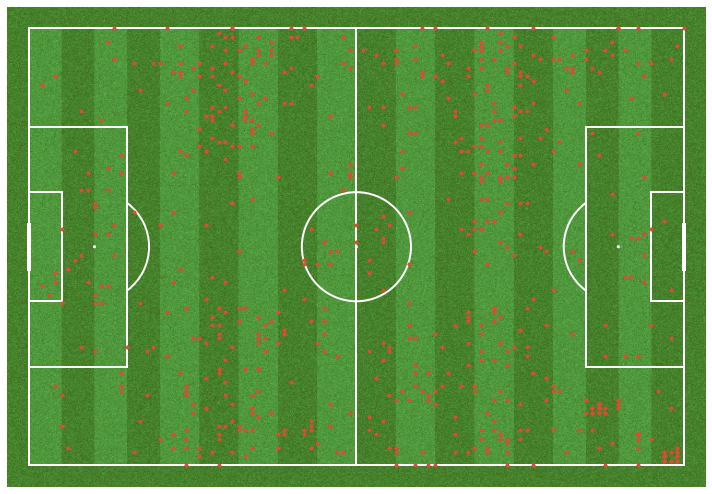

In [47]:
from mplsoccer.pitch import Pitch
import matplotsoccer
import matplotlib.pyplot as plt
plt.style.use('ggplot')

pitch = Pitch(pitch_color='grass', line_color='white', stripe=True, figsize=(10, 8))

fig, ax = pitch.draw()

sc = pitch.scatter(oneGame.x, oneGame.y,
                   cmap='hsv',
                   s=10, label='scatter', ax=ax)

## Postitional Visualization

We will take the centroid for each player's actions and use that to visualize the tactics for the team.

In [131]:
# function to find the centroid for each player
def centroid(xVal, yVal, player):
    center = []
    xCent = np.sum(xVal)/len(xVal)
    yCent = np.sum(yVal)/len(yVal)
    center.append(xCent)
    center.append(yCent)
    center.append(player)
    return center

The game will generally have substitutions in the second half, we will start with the first half to keep the number of players down to 10.

In [79]:
halfOne = oneGame[oneGame['matchPeriod'] == '1H']

In [85]:
halfOne.head()

,gameweek,winner,competitionId,eventId,subEventName,eventName,teamId,matchPeriod,eventSec,subEventId,lastName,role,x,y,positionGrid
2913294,4.0,Tottenham Hotspur,English first division,1.0,Ground attacking duel,Duel,Tottenham Hotspur,1H,13.363172,11,Sissoko,MD,38.4,72.8,7.0
2913295,4.0,Tottenham Hotspur,English first division,1.0,Ground defending duel,Duel,Tottenham Hotspur,1H,38.240206,12,Sissoko,MD,40.8,76.8,7.0
2913296,4.0,Tottenham Hotspur,English first division,8.0,Simple pass,Pass,Tottenham Hotspur,1H,176.452467,85,Sissoko,MD,46.8,48.0,6.0
2913297,4.0,Tottenham Hotspur,English first division,1.0,Ground attacking duel,Duel,Tottenham Hotspur,1H,383.790810,11,Sissoko,MD,69.6,43.2,10.0
2913298,4.0,Tottenham Hotspur,English first division,8.0,Simple pass,Pass,Tottenham Hotspur,1H,386.044006,85,Sissoko,MD,81.6,40.8,10.0


In [80]:
playerList = halfOne.lastName.unique()
print(playerList)

['Sissoko' 'Alderweireld' 'Kane' 'Dier' 'Dannemann Eriksen' 'Alli'
 'Sánchez Mina' 'Trippier' 'Vertonghen' 'Davies']


Starting lineup: Sissoko, Alderweireld, Kane, Dier, Dannemann Eriksen, Alli,
 Sánchez Mina, Trippier, Vertonghen, Davies.

In [83]:
from pandas import DataFrame

form = []
for i in playerList:
    center = []
    role = halfOne[halfOne.lastName == i]
    
    form.append(centroid(role.x, role.y, i))

    formation = DataFrame (form,columns=['x','y','name'])    

In [89]:
halfOne.groupby('lastName')['role'].unique().to_dict()

# creating a dictionary to correlate players to their positions
positions = halfOne.set_index('lastName').to_dict()['role']

# use the dictionary to add role to the formation dataframe
formation['role']= formation['name'].map(positions)

In [90]:
formation.head(11)

,x,y,name,role
0,67.837500,56.125000,Sissoko,MD
1,39.101887,60.045283,Alderweireld,DF
2,89.261538,44.676923,Kane,FW
3,68.488889,45.037037,Dier,MD
4,76.110000,33.700000,Dannemann Eriksen,MD
5,82.472727,47.527273,Alli,MD
6,34.302439,36.760976,Sánchez Mina,DF
7,54.690000,73.120000,Trippier,DF
8,48.736364,23.545455,Vertonghen,DF
9,77.742857,11.733333,Davies,DF


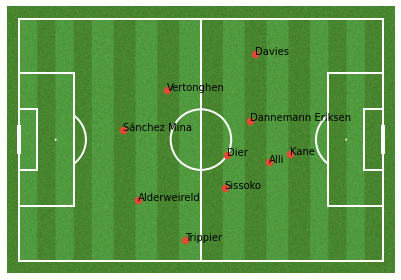

In [93]:
pitch = Pitch(pitch_color='grass', line_color='white', stripe=True)

fig, ax = pitch.draw()

sc = pitch.scatter(formation.x, formation.y, 
                   cmap='hsv',
                   s=50, label='scatter', ax=ax)

for i, txt in enumerate(formation.name):
    ax.annotate(txt, (formation.x[i], formation.y[i]))

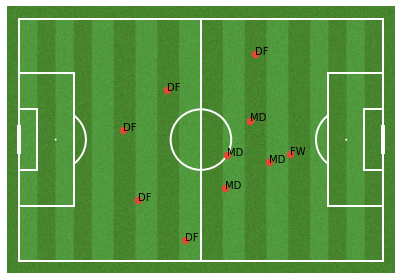

In [92]:
pitch = Pitch(pitch_color='grass', line_color='white', stripe=True)

fig, ax = pitch.draw()

sc = pitch.scatter(formation.x, formation.y, 
                   cmap='hsv',
                   s=50, label='scatter', ax=ax)

for i, txt in enumerate(formation.role):
    ax.annotate(txt, (formation.x[i], formation.y[i]))

When looking at the lineup from this game we can see that they ran a 3-5-1-1 with two defenders playing on the outside positions of the midfield 5. This means our visualization pretty well mirrors the formation used.

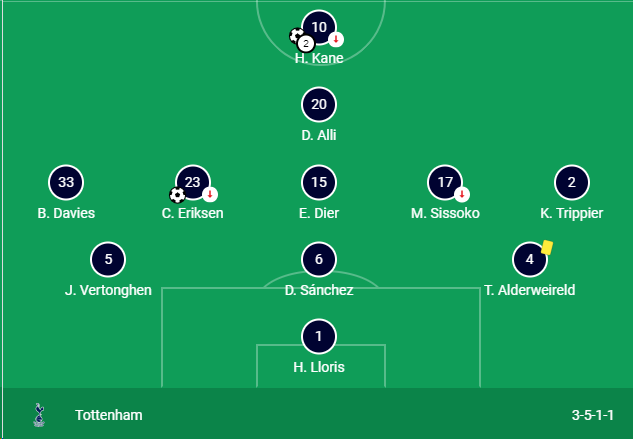
Retrieved from: https://www.google.com/search?q=everton+tottenham+9+September+2017&rlz=1C1CHBF_enUS891US892&oq=everton+tottenham+9+September+2017&aqs=chrome..69i57j33i160.4598j0j15&sourceid=chrome&ie=UTF-8#sie=m;/g/11f4qbqn9t;2;/m/02_tc;ln;fp;1;;

In [95]:
def team_df(name, week, half):
    team = soccer[soccer.teamId == name]
    
    # now a dataframe containing just one game
    oneGame = team[team.gameweek == week]
    
    # drop the goalkeeper
    oneGame.drop(oneGame[oneGame['role'] == 'GK'].index, inplace = True) 
    
    # select the half
    half = oneGame[oneGame['matchPeriod'] == half]
    
    return half

In [96]:
juv = team_df('Juventus', 5, '1H')

In [97]:
juv.head()

,gameweek,winner,competitionId,eventId,subEventName,eventName,teamId,matchPeriod,eventSec,subEventId,lastName,role,x,y,positionGrid
965014,5.0,Juventus,Italian first division,8.0,Simple pass,Pass,Juventus,1H,3.140095,85,Exequiel Dybala,FW,58.8,40.0,5.0
965015,5.0,Juventus,Italian first division,7.0,Touch,Others on the ball,Juventus,1H,77.576850,72,Exequiel Dybala,FW,88.8,26.4,9.0
965016,5.0,Juventus,Italian first division,1.0,Ground attacking duel,Duel,Juventus,1H,82.455493,11,Exequiel Dybala,FW,99.6,16.0,12.0
965017,5.0,Juventus,Italian first division,8.0,Simple pass,Pass,Juventus,1H,83.468711,85,Exequiel Dybala,FW,98.4,21.6,13.0
965018,5.0,Juventus,Italian first division,1.0,Ground defending duel,Duel,Juventus,1H,85.019847,12,Exequiel Dybala,FW,108.0,22.4,13.0


In [140]:
def formation(gameDF):
    # create a list of the player names
    players = gameDF.lastName.unique()
    
    pos = []
    for i in players:
        role = gameDF[gameDF.lastName == i]
    
        pos.append(centroid(role.x, role.y, i))

        formation = DataFrame (pos,columns=['x','y','name'])
    
    formation = positions(gameDF, formation)


    return formation

In [141]:
def positions(gameDF, formDF):
    # creating a dictionary to correlate players to their positions
    positions = gameDF.set_index('lastName').to_dict()['role']

    # use the dictionary to add role to the formation dataframe
    formDF['role']= formDF['name'].map(positions)
    return formDF

In [143]:
tactics = formation(juv)

In [144]:
tactics

,x,y,name,role
0,80.225000,46.716667,Exequiel Dybala,FW
1,45.844444,52.296296,Rugani,DF
2,42.975000,24.283333,Barzagli,DF
3,70.069565,14.886957,Mandžukić,FW
4,60.000000,70.688000,Sturaro,MD
5,59.520000,45.469091,Bentancur Colmán,MD
6,78.096000,46.048000,Higuaín,FW
7,64.729412,27.450980,Matuidi,MD
8,66.408511,9.123404,Asamoah,MD
9,70.223077,65.384615,Cuadrado Bello,MD


In [125]:
juv

,gameweek,winner,competitionId,eventId,subEventName,eventName,teamId,matchPeriod,eventSec,subEventId,lastName,role,x,y,positionGrid
965014,5.0,Juventus,Italian first division,8.0,Simple pass,Pass,Juventus,1H,3.140095,85,Exequiel Dybala,FW,58.8,40.0,5.0
965015,5.0,Juventus,Italian first division,7.0,Touch,Others on the ball,Juventus,1H,77.576850,72,Exequiel Dybala,FW,88.8,26.4,9.0
965016,5.0,Juventus,Italian first division,1.0,Ground attacking duel,Duel,Juventus,1H,82.455493,11,Exequiel Dybala,FW,99.6,16.0,12.0
965017,5.0,Juventus,Italian first division,8.0,Simple pass,Pass,Juventus,1H,83.468711,85,Exequiel Dybala,FW,98.4,21.6,13.0
965018,5.0,Juventus,Italian first division,1.0,Ground defending duel,Duel,Juventus,1H,85.019847,12,Exequiel Dybala,FW,108.0,22.4,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1119420,5.0,Juventus,Italian first division,8.0,Simple pass,Pass,Juventus,1H,2387.765506,85,Cuadrado Bello,MD,67.2,62.4,11.0
1119421,5.0,Juventus,Italian first division,1.0,Ground attacking duel,Duel,Juventus,1H,2397.827576,11,Cuadrado Bello,MD,84.0,74.4,11.0
1119422,5.0,Juventus,Italian first division,1.0,Ground attacking duel,Duel,Juventus,1H,2398.503574,11,Cuadrado Bello,MD,81.6,66.4,11.0
1119423,5.0,Juventus,Italian first division,7.0,Touch,Others on the ball,Juventus,1H,2673.934310,72,Cuadrado Bello,MD,84.0,58.4,10.0
